A partir del archivo food_100, se pide:

1. Limpiar el archivo borrando las columnas Unnamed.
2. ¿Qué porcentaje de valores NaN hay en cada columna?
3. ¿Tendría algún sentido clasificar el nombre de los alimentos a partir del top5 de columnas numéricas con menos valores NaN?

In [135]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import plot

df = pd.read_csv("../data/food_100.csv")

In [136]:
#1. Limpiar el archivo borrando las columnas Unnamed.
df.drop("Unnamed: 0", 1, inplace=True)

In [137]:
#filter for numeric data
df_numeric = df._get_numeric_data()

In [152]:
#2. ¿Qué porcentaje de valores NaN hay en cada columna?
list_nan = df_numeric.isna().sum() / len(df) * 100
list_nan

code                         0.0
created_t                    0.0
last_modified_t              0.0
generic_name               100.0
origins                    100.0
                           ...  
nutrition-score-fr_100g     63.0
nutrition-score-uk_100g     63.0
glycemic-index_100g        100.0
water-hardness_100g        100.0
product_name                 0.0
Length: 129, dtype: float64

In [144]:
def none_values(df):

    if len(df[df.isnull().any(axis=1)] != 0):
        #print("\nPreview of data with null values:")
        #display(df[df.isnull().any(axis=1)].head(3))
        missingno.matrix(df)
        plt.show()

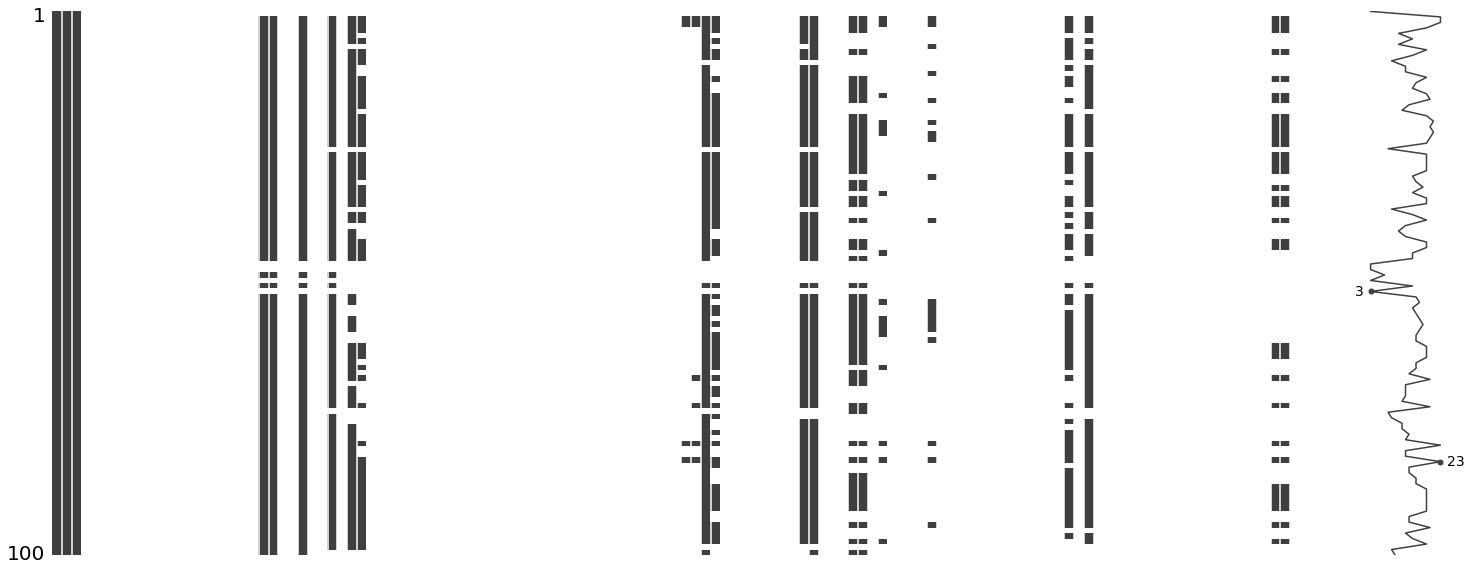

In [145]:
none_values(df=df_numeric)   # -> why does this graph not show clearly the columns?

In [ ]:
#¿Tendría algún sentido clasificar el nombre de los alimentos a partir del top5 de columnas numéricas con menos valores NaN?

In [154]:
#Finding top5 columns with 0% values NaN
list_nan.sort_values().head(5)

code                           0.0
last_modified_t                0.0
product_name                   0.0
created_t                      0.0
ingredients_from_palm_oil_n    5.0
dtype: float64

In [147]:
#labeling the target columns: product_name
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_numeric["product_name"] = labelencoder.fit_transform(df["product_name"].astype(str))

In [148]:
#filtering df for the product_name and the columns found in the top 5 columns with the least nan values
df_top_5 = df_numeric[["code", "created_t", "last_modified_t", "ingredients_from_palm_oil_n", "ingredients_from_palm_oil_n"]]
df_top_5["product_name"] = df_numeric["product_name"]

In [149]:
df_top_5

,code,created_t,last_modified_t,ingredients_from_palm_oil_n,ingredients_from_palm_oil_n,product_name
0,3087,1474103866,1474103893,NaN,NaN,14
1,4530,1489069957,1489069957,0.0,0.0,6
2,4559,1489069957,1489069957,0.0,0.0,84
3,16087,1489055731,1489055731,0.0,0.0,65
4,16094,1489055653,1489055653,0.0,0.0,57
...,...,...,...,...,...,...
95,34715,1489055715,1489055715,0.0,0.0,55
96,34784,1489138485,1489138485,0.0,0.0,96
97,34791,1489055720,1489055720,0.0,0.0,59
98,35071,1489138484,1489138484,0.0,0.0,39


In [151]:
#check correlation
df_top_5.corr()

,code,created_t,last_modified_t,ingredients_from_palm_oil_n,ingredients_from_palm_oil_n,product_name
code,1.000000,0.048606,0.048609,NaN,NaN,0.084424
created_t,0.048606,1.000000,1.000000,NaN,NaN,0.035374
last_modified_t,0.048609,1.000000,1.000000,NaN,NaN,0.035366
ingredients_from_palm_oil_n,NaN,NaN,NaN,NaN,NaN,NaN
ingredients_from_palm_oil_n,NaN,NaN,NaN,NaN,NaN,NaN
product_name,0.084424,0.035374,0.035366,NaN,NaN,1.000000


There is almost no correlation between the columns with the least % nan values and the target column: product_name. So it would not make sense to use these columns in a model for classification. 

------------

In [ ]:
#finding out if there are maybe other columns that do have a higher correlation with the target column. 

In [163]:
df = pd.read_csv("../data/food_100.csv")

df_numeric = df._get_numeric_data()
total_df = df_numeric

from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
total_df["product_name"] = labelencoder.fit_transform(df["product_name"].astype(str))
total_df

,Unnamed: 0,code,created_t,last_modified_t,generic_name,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,...,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,product_name
0,0,3087,1474103866,1474103893,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
1,1,4530,1489069957,1489069957,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN,6
2,2,4559,1489069957,1489069957,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,84
3,3,16087,1489055731,1489055731,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN,65
4,4,16094,1489055653,1489055653,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,34715,1489055715,1489055715,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55
96,96,34784,1489138485,1489138485,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96
97,97,34791,1489055720,1489055720,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN,59
98,98,35071,1489138484,1489138484,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39


In [165]:
corr = total_df.corr()
corr.head()

,Unnamed: 0,code,created_t,last_modified_t,generic_name,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,...,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,product_name
Unnamed: 0,1.000000,0.937375,0.045576,0.045578,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.176240,0.176240,NaN,NaN,0.047837
code,0.937375,1.000000,0.048606,0.048609,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.108270,0.108270,NaN,NaN,0.084424
created_t,0.045576,0.048606,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.016720,-0.016720,NaN,NaN,0.035374
last_modified_t,0.045578,0.048609,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.016719,-0.016719,NaN,NaN,0.035366
generic_name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [166]:
cor_target = abs(corr["product_name"])
#relevant_features = cor_target[cor_target>0.3]
cor_target.sort_values(ascending=False)

product_name               1.000000
vitamin-c_100g             0.595786
cholesterol_100g           0.357786
proteins_100g              0.225563
nutrition-score-fr_100g    0.128955
                             ...   
cocoa_100g                      NaN
chlorophyl_100g                 NaN
carbon-footprint_100g           NaN
glycemic-index_100g             NaN
water-hardness_100g             NaN
Name: product_name, Length: 130, dtype: float64

The columns with the highest correlation with the target column is 0.5 and then 0.3 or 0.2. They are all very low correlations